Importation of modules and functions
===

In [2]:
# Modules
import csv
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import sys
import datetime
import random
import warnings

# Functions
sys.path.insert(0, './implementations/')
from implementations import *
from preprocessing import *
from pca import *
from plot import *
from helpers import *

# Autoreload
%load_ext autoreload
%autoreload 2

# Set random seed
np.random.seed(1)

Training data loading
===

In [3]:
(labels_raw, data_raw, ids_raw) = load_csv_data("data/train.csv")

Splitting data and jets
===

In [4]:
# Splitting data
X_train, y_train, X_test, y_test = split_data(data_raw, labels_raw)

# Get feature jet_num
jets = X_train[:,22]
jets_t = X_test[:,22]

# Get index of samples with appropriate jet
idx_jet0 = np.argwhere(jets == 0)[:,0]
idx_jet1 = np.argwhere(jets == 1)[:,0]
idx_jet2 = np.argwhere(jets >= 2)[:,0]

idx_jet0_t = np.argwhere(jets_t == 0)[:,0]
idx_jet1_t = np.argwhere(jets_t == 1)[:,0]
idx_jet2_t = np.argwhere(jets_t >= 2)[:,0]

In [5]:
# Remove jet_num feature as it will be constant after separation
X_train = np.delete(X_train, 22, axis=1)
X_test = np.delete(X_test, 22, axis=1)

# Split data relative to jets
data_tr_j0 = X_train[idx_jet0,:]
data_tr_j1 = X_train[idx_jet1,:]
data_tr_j2 = X_train[idx_jet2,:]

data_ts_j0 = X_test[idx_jet0_t,:]
data_ts_j1 = X_test[idx_jet1_t,:]
data_ts_j2 = X_test[idx_jet2_t,:]

# Split labels relative to jets
lab_j0 = y_train[idx_jet0]
lab_j1 = y_train[idx_jet1]
lab_j2 = y_train[idx_jet2]

lab_j0_t = y_test[idx_jet0_t]
lab_j1_t = y_test[idx_jet1_t]
lab_j2_t = y_test[idx_jet2_t]

Data filtering and normalization
===

In [6]:
# Filtering features, missing values and outliers
data_j0, data_j0_t = process_data(data_tr_j0, data_ts_j0)
data_j1, data_j1_t = process_data(data_tr_j1, data_ts_j1)
data_j2, data_j2_t = process_data(data_tr_j2, data_ts_j2)

Filtering features
Finding and replacing outliers by column mean
Replacing NaN points with feature mean value
Standardizing the data
Filtering features
Finding and replacing outliers by column mean
Replacing NaN points with feature mean value
Standardizing the data
Filtering features
Finding and replacing outliers by column mean
Replacing NaN points with feature mean value
Standardizing the data


In [7]:
# Transforming data using polynomials, log and interaction terms
y_j0, tx_j0, y_j0_t, tx_j0_t = transform_data(data_j0, data_j0_t, lab_j0, lab_j0_t)
y_j1, tx_j1, y_j1_t, tx_j1_t = transform_data(data_j1, data_j1_t, lab_j1, lab_j1_t)
y_j2, tx_j2, y_j2_t, tx_j2_t = transform_data(data_j2, data_j2_t, lab_j2, lab_j2_t)

Building polynomial of degree 4
Building the interactive terms
Taking the log value of the data
Building the interactive terms of order three
Performing PCA and keeping feature explaining 1 of the variance
Reducing the number of PCA to 382
Adding a columns of ones to the dataset
Building polynomial of degree 4
Building the interactive terms
Taking the log value of the data
Building the interactive terms of order three
Performing PCA and keeping feature explaining 1 of the variance
Reducing the number of PCA to 556
Adding a columns of ones to the dataset
Building polynomial of degree 4
Building the interactive terms
Taking the log value of the data
Building the interactive terms of order three
Performing PCA and keeping feature explaining 1 of the variance
Reducing the number of PCA to 957
Adding a columns of ones to the dataset


In [10]:
max_iter = 50

initial_w = np.zeros(tx_j0.shape[1])
losses, losses_t, acc0, acc_t0, w_0 = logistic_hessian(y_j0, tx_j0, y_j0_t, tx_j0_t, initial_w, gamma = 0.08, lam = 0.01, momentum = 0.1, max_iters = max_iter)

initial_w = np.zeros(tx_j1.shape[1])
losses, losses_t, acc1, acc_t1, w_1 = logistic_hessian(y_j1, tx_j1, y_j1_t, tx_j1_t, initial_w, gamma = 0.0575, lam = 10, momentum = 0, max_iters = max_iter)

initial_w = np.zeros(tx_j2.shape[1])
losses, losses_t, acc2, acc_t2, w_2 = logistic_hessian(y_j2, tx_j2, y_j2_t, tx_j2_t, initial_w, gamma = 0.065, lam = 10, momentum = 0, max_iters = max_iter)

25/50	 train acc : 0.8503309435331506 	 | test acc : 0.8454227113556778
50/50	 train acc : 0.8512943708319257 	 | test acc : 0.8469734867433717
25/50	 train acc : 0.8157457449382916 	 | test acc : 0.8158622019409988
50/50	 train acc : 0.8187626038557716 	 | test acc : 0.8178546179060351
25/50	 train acc : 0.8492047097707085 	 | test acc : 0.8409106636218947
50/50	 train acc : 0.8517007505336363 	 | test acc : 0.8425022489793094


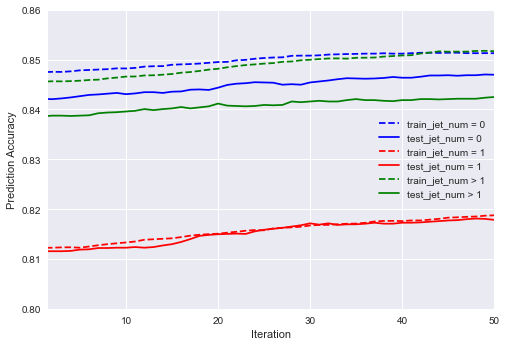

In [12]:
# Plotting the training and testing accuracies of the three jet groups

plt.style.use('seaborn')

plt.ylim(0.8, 0.86)
plt.xlim(1.5,50)
plt.plot(acc0, label='train_jet_num = 0', c='blue', linestyle='dashed')
plt.plot(acc_t0, label='test_jet_num = 0', c='blue')

plt.plot(acc1, label='train_jet_num = 1', c='red', linestyle='dashed')
plt.plot(acc_t1, label='test_jet_num = 1', c='red')

plt.plot(acc2, label='train_jet_num > 1', c='green', linestyle='dashed')
plt.plot(acc_t2, label='test_jet_num > 1', c='green')

plt.xlabel('Iteration')
plt.ylabel('Prediction Accuracy')
plt.legend()
plt.savefig('jet_acc.png')

plt.show()

Grid search for best lambda and learning rate
===

Jet num = 0
==

In [99]:
num_iter = 50
lr = np.linspace(0.05,0.08,5)
lamb = np.logspace(-2,2,5)

initial_w = np.zeros(tx_j0.shape[1])

best_gamma = 0
best_lambda = 0
best_acc = 0
grid_acc = np.zeros([len(lr),len(lamb)])

# Performing grid search for lambda and gamma(learning rate)
for g in range(len(lr)):
    for l in range(len(lamb)):
        grid_acc[g,l] = Grid_Search_logistic(y_j0, tx_j0, y_j0_t, tx_j0_t, initial_w, gamma=lr[g], lam=lamb[l], max_iters = num_iter, momentum = 0)
        print("gamma: {0} \t| lambda: {1} \t| test acc: {2}".format(lr[g],lamb[l], grid_acc[g,l]))
        if (grid_acc[g,l] > best_acc):
            best_acc = grid_acc[g,l]
            best_gamma = lr[g]
            best_lambda = lamb[l]

file = "grid_search_logistic_jet0.npy"
np.save(file, grid_acc)

gamma: 0.05 	| lambda: 0.01 	| test acc: 0.8451225612806403
gamma: 0.05 	| lambda: 0.1 	| test acc: 0.8451725862931466
gamma: 0.05 	| lambda: 1.0 	| test acc: 0.8451725862931466
gamma: 0.05 	| lambda: 10.0 	| test acc: 0.8453226613306654
gamma: 0.05 	| lambda: 100.0 	| test acc: 0.8451725862931466
gamma: 0.0575 	| lambda: 0.01 	| test acc: 0.8459229614807404
gamma: 0.0575 	| lambda: 0.1 	| test acc: 0.8459229614807404
gamma: 0.0575 	| lambda: 1.0 	| test acc: 0.8458729364682341
gamma: 0.0575 	| lambda: 10.0 	| test acc: 0.8453726863431715
gamma: 0.0575 	| lambda: 100.0 	| test acc: 0.8453726863431715
gamma: 0.065 	| lambda: 0.01 	| test acc: 0.8462231115557779
gamma: 0.065 	| lambda: 0.1 	| test acc: 0.8462731365682842
gamma: 0.065 	| lambda: 1.0 	| test acc: 0.8462731365682842
gamma: 0.065 	| lambda: 10.0 	| test acc: 0.8458729364682341
gamma: 0.065 	| lambda: 100.0 	| test acc: 0.8455227613806904
gamma: 0.07250000000000001 	| lambda: 0.01 	| test acc: 0.8463231615807904
gamma: 0.0725

Jet num = 1
==

In [101]:
num_iter = 50
lr = np.linspace(0.05,0.08,5)
lamb = np.logspace(-2,2,5)

initial_w = np.zeros(tx_j1.shape[1])

best_gamma = 0
best_lambda = 0
best_acc = 0
grid_acc = np.zeros([len(lr),len(lamb)])

# Performing grid search for lambda and gamma(learning rate)
for g in range(len(lr)):
    for l in range(len(lamb)):
        grid_acc[g,l] = Grid_Search_logistic(y_j1, tx_j1, y_j1_t, tx_j1_t, initial_w, gamma=lr[g], lam=lamb[l], max_iters = num_iter, momentum = 0)
        print("gamma: {0} \t| lambda: {1} \t| test acc: {2}".format(lr[g],lamb[l], grid_acc[g,l]))
        if (grid_acc[g,l] > best_acc):
            best_acc = grid_acc[g,l]
            best_gamma = lr[g]
            best_lambda = lamb[l]

file = "grid_search_logistic_jet1.npy"
np.save(file, grid_acc)

gamma: 0.05 	| lambda: 0.01 	| test acc: 0.8168905456648885
gamma: 0.05 	| lambda: 0.1 	| test acc: 0.8168905456648885
gamma: 0.05 	| lambda: 1.0 	| test acc: 0.817211903078604
gamma: 0.05 	| lambda: 10.0 	| test acc: 0.8176618034578058
gamma: 0.05 	| lambda: 100.0 	| test acc: 0.8166977312166591
gamma: 0.0575 	| lambda: 0.01 	| test acc: 0.8167620026994022
gamma: 0.0575 	| lambda: 0.1 	| test acc: 0.8167620026994022
gamma: 0.0575 	| lambda: 1.0 	| test acc: 0.8168905456648885
gamma: 0.0575 	| lambda: 10.0 	| test acc: 0.8178546179060351
gamma: 0.0575 	| lambda: 100.0 	| test acc: 0.816569188251173
gamma: 0.065 	| lambda: 0.01 	| test acc: 0.8165049167684298
gamma: 0.065 	| lambda: 0.1 	| test acc: 0.8165049167684298
gamma: 0.065 	| lambda: 1.0 	| test acc: 0.8168905456648885
gamma: 0.065 	| lambda: 10.0 	| test acc: 0.8172761745613472
gamma: 0.065 	| lambda: 100.0 	| test acc: 0.8170833601131178
gamma: 0.07250000000000001 	| lambda: 0.01 	| test acc: 0.8166977312166591
gamma: 0.072500

Jet num > 1
==

In [100]:
num_iter = 50
lr = np.linspace(0.05,0.08,5)
lamb = np.logspace(-2,2,5)

initial_w = np.zeros(tx_j2.shape[1])

best_gamma = 0
best_lambda = 0
best_acc = 0
grid_acc = np.zeros([len(lr),len(lamb)])

# Performing grid search for lambda and gamma(learning rate)
for g in range(len(lr)):
    for l in range(len(lamb)):
        grid_acc[g,l] = Grid_Search_logistic(y_j2, tx_j2, y_j2_t, tx_j2_t, initial_w, gamma=lr[g], lam=lamb[l], max_iters = num_iter, momentum = 0)
        print("gamma: {0} \t| lambda: {1} \t| test acc: {2}".format(lr[g],lamb[l], grid_acc[g,l]))
        if (grid_acc[g,l] > best_acc):
            best_acc = grid_acc[g,l]
            best_gamma = lr[g]
            best_lambda = lamb[l]

file = "grid_search_logistic_jet2.npy"
np.save(file, grid_acc)


gamma: 0.05 	| lambda: 0.01 	| test acc: 0.8413950591654556
gamma: 0.05 	| lambda: 0.1 	| test acc: 0.8413950591654556
gamma: 0.05 	| lambda: 1.0 	| test acc: 0.8418102553456508
gamma: 0.05 	| lambda: 10.0 	| test acc: 0.8418102553456508
gamma: 0.05 	| lambda: 100.0 	| test acc: 0.8406338661684313
gamma: 0.0575 	| lambda: 0.01 	| test acc: 0.8415334578921874
gamma: 0.0575 	| lambda: 0.1 	| test acc: 0.8416026572555533
gamma: 0.0575 	| lambda: 1.0 	| test acc: 0.8414642585288216
gamma: 0.0575 	| lambda: 10.0 	| test acc: 0.8419486540723825
gamma: 0.0575 	| lambda: 100.0 	| test acc: 0.8416026572555533
gamma: 0.065 	| lambda: 0.01 	| test acc: 0.8411182617119922
gamma: 0.065 	| lambda: 0.1 	| test acc: 0.8411182617119922
gamma: 0.065 	| lambda: 1.0 	| test acc: 0.8412566604387239
gamma: 0.065 	| lambda: 10.0 	| test acc: 0.8425022489793094
gamma: 0.065 	| lambda: 100.0 	| test acc: 0.8416718566189191
gamma: 0.07250000000000001 	| lambda: 0.01 	| test acc: 0.8413950591654556
gamma: 0.0725

Heat maps for the grid search
==

In [102]:
# Initalizing the parameters:
lr = np.linspace(0.05,0.08,5)
lamb = np.logspace(-2,2,5)

Text(52,0.5,'gamma')

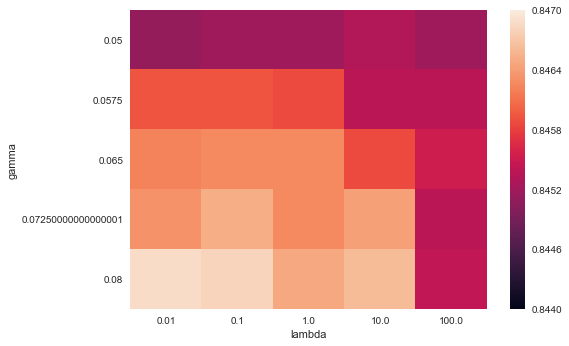

In [103]:
file = "grid_search_logistic_jet0.npy"
grid_acc = np.load(file)
import seaborn as sns; sns.set()
ax = sns.heatmap(grid_acc,xticklabels=lamb, yticklabels=lr,vmin= 0.844, vmax=0.847)
ax.set_xlabel('lambda')
ax.set_ylabel('gamma')

Text(52,0.5,'gamma')

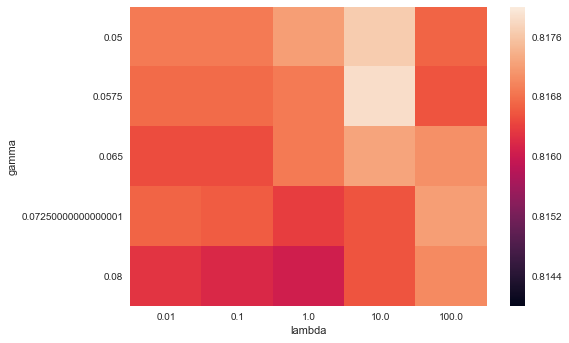

In [104]:
file = "grid_search_logistic_jet1.npy"
grid_acc = np.load(file)
import seaborn as sns; sns.set()
ax = sns.heatmap(grid_acc,xticklabels=lamb, yticklabels=lr,vmin= 0.814, vmax=0.818)
ax.set_xlabel('lambda')
ax.set_ylabel('gamma')

Text(52,0.5,'gamma')

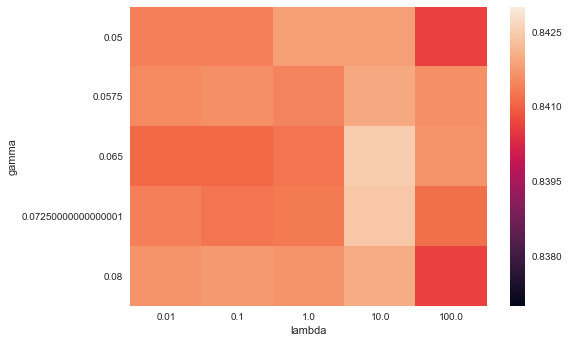

In [105]:
file = "grid_search_logistic_jet2.npy"
grid_acc = np.load(file)
import seaborn as sns; sns.set()
ax = sns.heatmap(grid_acc,xticklabels=lamb, yticklabels=lr,vmin= 0.837, vmax=0.843)
ax.set_xlabel('lambda')
ax.set_ylabel('gamma')

Grid search for best alpha for momentum
===

Jet num = 0
==

In [106]:
num_iter = 50
mom = np.arange(0,1,0.1)

initial_w = np.zeros(tx_j0.shape[1])

best_mom = 0
best_acc = 0
grid_acc = np.zeros(mom.shape)

# Performing grid search for momentum
for m in range(len(mom)):
    grid_acc[m] = Grid_Search_logistic(y_j0, tx_j0, y_j0_t, tx_j0_t, initial_w, gamma=0.08, lam=0.01, max_iters = num_iter, momentum = mom[m])
    print("momentum alpha: {0} \t| test acc: {1}".format(mom[m], grid_acc[m]))
    if (grid_acc[m] > best_acc):
        best_acc = grid_acc[m]
        best_mom = mom[m]

file = "grid_search_logistic_jet0_momentum.npy"
np.save(file, grid_acc)

momentum alpha: 0.0 	| test acc: 0.8468734367183591
momentum alpha: 0.1 	| test acc: 0.8469734867433717
momentum alpha: 0.2 	| test acc: 0.8462731365682842
momentum alpha: 0.30000000000000004 	| test acc: 0.8466233116558279
momentum alpha: 0.4 	| test acc: 0.8465732866433217
momentum alpha: 0.5 	| test acc: 0.8465232616308154
momentum alpha: 0.6000000000000001 	| test acc: 0.8465232616308154
momentum alpha: 0.7000000000000001 	| test acc: 0.8465232616308154
momentum alpha: 0.8 	| test acc: 0.8465232616308154
momentum alpha: 0.9 	| test acc: 0.8465232616308154


Jet num = 1
==

In [108]:
num_iter = 50
mom = np.arange(0,1,0.1)

initial_w = np.zeros(tx_j1.shape[1])

best_mom = 0
best_acc = 0
grid_acc = np.zeros(mom.shape)

# Performing grid search for momentum
for m in range(len(mom)):
    grid_acc[m] = Grid_Search_logistic(y_j1, tx_j1, y_j1_t, tx_j1_t, initial_w, gamma=0.0575, lam=10, max_iters = num_iter, momentum = mom[m])
    print("momentum alpha: {0} \t| test acc: {1}".format(mom[m], grid_acc[m]))
    if (grid_acc[m] > best_acc):
        best_acc = grid_acc[m]
        best_mom = mom[m]

file = "grid_search_logistic_jet1_momentum.npy"
np.save(file, grid_acc)

momentum alpha: 0.0 	| test acc: 0.8178546179060351
momentum alpha: 0.1 	| test acc: 0.817211903078604
momentum alpha: 0.2 	| test acc: 0.8166977312166591
momentum alpha: 0.30000000000000004 	| test acc: 0.8163763738029436
momentum alpha: 0.4 	| test acc: 0.815990744906485
momentum alpha: 0.5 	| test acc: 0.8162478308374574
momentum alpha: 0.6000000000000001 	| test acc: 0.8161835593547143
momentum alpha: 0.7000000000000001 	| test acc: 0.8161835593547143
momentum alpha: 0.8 	| test acc: 0.8163121023202006
momentum alpha: 0.9 	| test acc: 0.8154765730445401


Jet num > 1
==

In [107]:
num_iter = 50
mom = np.arange(0,1,0.1)

initial_w = np.zeros(tx_j2.shape[1])

best_mom = 0
best_acc = 0
grid_acc = np.zeros(mom.shape)

# Performing grid search for momentum
for m in range(len(mom)):
    grid_acc[m] = Grid_Search_logistic(y_j2, tx_j2, y_j2_t, tx_j2_t, initial_w, gamma=0.065, lam=10, max_iters = num_iter, momentum = mom[m])
    print("momentum alpha: {0} \t| test acc: {1}".format(mom[m], grid_acc[m]))
    if (grid_acc[m] > best_acc):
        best_acc = grid_acc[m]
        best_mom = mom[m]

file = "grid_search_logistic_jet2_momentum.npy"
np.save(file, grid_acc)

momentum alpha: 0.0 	| test acc: 0.8425022489793094
momentum alpha: 0.1 	| test acc: 0.8424330496159436
momentum alpha: 0.2 	| test acc: 0.8421562521624801
momentum alpha: 0.30000000000000004 	| test acc: 0.8418794547090167
momentum alpha: 0.4 	| test acc: 0.8413950591654556
momentum alpha: 0.5 	| test acc: 0.8413258598020898
momentum alpha: 0.6000000000000001 	| test acc: 0.8413258598020898
momentum alpha: 0.7000000000000001 	| test acc: 0.8412566604387239
momentum alpha: 0.8 	| test acc: 0.8413258598020898
momentum alpha: 0.9 	| test acc: 0.8411182617119922
